# **PREDICTING STUDENT DROP-OFFS OR ENGAGEMENT LEVELS**
- **Objective**
- To predict student drop-offs or engagement levels
to help the company take proactive measures to improve retention and participation.

# **Import necessary libraries**
---

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

# **Reading Dataset**
---

In [79]:
df= pd.read_csv('C:/Data Hub/SLU Opportunity Wise Data.csv')
df.head().T

,0,1,2,3,4
Learner SignUp DateTime,06/14/2023 12:30:35,05/01/2023 05:29:16,04/09/2023 20:35:08,08/29/2023 05:20:03,01/06/2023 15:26:36
Opportunity Id,00000000-0GN2-A0AY-7XK8-C5FZPP,00000000-0GN2-A0AY-7XK8-C5FZPP,00000000-0GN2-A0AY-7XK8-C5FZPP,00000000-0GN2-A0AY-7XK8-C5FZPP,00000000-0GN2-A0AY-7XK8-C5FZPP
Opportunity Name,Career Essentials: Getting Started with Your P...,Career Essentials: Getting Started with Your P...,Career Essentials: Getting Started with Your P...,Career Essentials: Getting Started with Your P...,Career Essentials: Getting Started with Your P...
Opportunity Category,Course,Course,Course,Course,Course
Opportunity End Date,06/29/2024 18:52:39,06/29/2024 18:52:39,06/29/2024 18:52:39,06/29/2024 18:52:39,06/29/2024 18:52:39
First Name,Faria,Poojitha,Emmanuel,Amrutha Varshini,Vinay Varshith
Date of Birth,01/12/2001,08/16/2000,01/27/2002,11/01/1999,04/19/2000
Gender,Female,Female,Male,Female,Male
Country,Pakistan,India,United States,United States,United States
Institution Name,Nwihs,SAINT LOUIS,Illinois Institute of Technology,Saint Louis University,Saint Louis University


# **Accessing and manipulating the column names**
---

In [80]:
df.columns.tolist()

['Learner SignUp DateTime',
 'Opportunity Id',
 'Opportunity Name',
 'Opportunity Category',
 'Opportunity End Date',
 'First Name',
 'Date of Birth',
 'Gender',
 'Country',
 'Institution Name',
 'Current/Intended Major',
 'Entry created at',
 'Status Description',
 'Status Code',
 'Apply Date',
 'Opportunity Start Date']

# **Drop the unnecessary column (First name)**
---

In [81]:
df = df.drop('First Name', axis=1)

# **Initial data structure**
---

In [82]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Learner SignUp DateTime  8558 non-null   object
 1   Opportunity Id           8558 non-null   object
 2   Opportunity Name         8558 non-null   object
 3   Opportunity Category     8558 non-null   object
 4   Opportunity End Date     8558 non-null   object
 5   Date of Birth            8558 non-null   object
 6   Gender                   8558 non-null   object
 7   Country                  8558 non-null   object
 8   Institution Name         8553 non-null   object
 9   Current/Intended Major   8553 non-null   object
 10  Entry created at         8558 non-null   object
 11  Status Description       8558 non-null   object
 12  Status Code              8558 non-null   int64 
 13  Apply Date               8558 non-null   object
 14  Opportunity Start Date   4764 non-null  

# **Assess the date columns to identify invalid input**
---

In [83]:
# Specify the columns you want to check for invalid dates
date_columns = [
    "Learner SignUp DateTime", "Opportunity End Date", "Date of Birth",
    "Entry created at", "Apply Date",
]
# Function to check for invalid date formats
def find_invalid_dates(df, date_columns):
    invalid_entries = {}
    for column in date_columns:
        if column in df.columns:
            # Check for invalid dates
            invalid_mask = pd.to_datetime(df[column], errors='coerce').isna()
            invalid_entries[column] = df[invalid_mask]
    return invalid_entries

# Check for invalid dates
invalid_dates = find_invalid_dates(df, date_columns)

# Print results
for column, entries in invalid_dates.items():
    if not entries.empty:
        print(f"Invalid entries in '{column}':")
        print(entries)
    else:
        print(f"No invalid entries in '{column}'.")

Invalid entries in 'Learner SignUp DateTime':
       Learner SignUp DateTime                  Opportunity Id  \
51         01/24/2024 24:25:19  00000000-0GN2-A0AY-7XK8-C5FZPP   
93    06/10/2023 1084920:58:20  00000000-0GN2-A0AY-7XK8-C5FZPP   
139   03/07/2024 1091424:10:44  00000000-0GN2-A0AY-7XK8-C5FZPP   
155        08/19/2023 24:13:56  00000000-0GN2-A0AY-7XK8-C5FZPP   
178        08/15/2023 24:37:14  00000000-0GN2-A0AY-7XK8-C5FZPP   
...                        ...                             ...   
8477       12/25/2023 24:18:23  00000000-10GQ-RJHT-3G4S-BKGBY1   
8494       08/23/2023 24:25:23  00000000-10GQ-RJHT-3G4S-BKGBY1   
8509       02/29/2024 24:26:05  00000000-10GQ-RJHT-3G4S-BKGBY1   
8539  09/10/2023 1084992:35:18  00000000-10GQ-RJHT-3G4S-BKGBY1   
8548       02/27/2024 24:19:05  00000000-10GQ-RJHT-3G4S-BKGBY1   

                                       Opportunity Name Opportunity Category  \
51    Career Essentials: Getting Started with Your P...               Course   
9

# **Convert all date columns to datetime format**
---

In [84]:
date_cols = [
    "Learner SignUp DateTime", "Opportunity End Date", "Date of Birth",
    "Entry created at", "Apply Date", "Opportunity Start Date"
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # invalid formats will become NaT
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Learner SignUp DateTime  8263 non-null   datetime64[ns]
 1   Opportunity Id           8558 non-null   object        
 2   Opportunity Name         8558 non-null   object        
 3   Opportunity Category     8558 non-null   object        
 4   Opportunity End Date     7296 non-null   datetime64[ns]
 5   Date of Birth            8558 non-null   datetime64[ns]
 6   Gender                   8558 non-null   object        
 7   Country                  8558 non-null   object        
 8   Institution Name         8553 non-null   object        
 9   Current/Intended Major   8553 non-null   object        
 10  Entry created at         8558 non-null   datetime64[ns]
 11  Status Description       8558 non-null   object        
 12  Status Code              8558 non-

# **Check for missing values**
---

In [85]:
df.isnull().sum()

Learner SignUp DateTime     295
Opportunity Id                0
Opportunity Name              0
Opportunity Category          0
Opportunity End Date       1262
Date of Birth                 0
Gender                        0
Country                       0
Institution Name              5
Current/Intended Major        5
Entry created at              0
Status Description            0
Status Code                   0
Apply Date                  307
Opportunity Start Date     4637
dtype: int64

# **Perform forward fill for the specified date columns**
---

In [86]:
# Perform forward fill for the specified date columns
date_columns = [
     "Learner SignUp DateTime", "Opportunity End Date", "Date of Birth",
    "Entry created at", "Apply Date", 
]

# Fill forward for each specified column
for column in date_columns:
    df[column] = df[column].fillna(method='ffill')

# Verify the changes
print(df[date_columns].isnull().sum())  # Check for any remaining NaN values

Learner SignUp DateTime    0
Opportunity End Date       0
Date of Birth              0
Entry created at           0
Apply Date                 0
dtype: int64


# **Fill the two missing rows with unknown**
---

In [87]:
df["Institution Name"].fillna("Unknown", inplace=True)
df["Current/Intended Major"].fillna("Undeclared", inplace=True)

# **Handling opportunity start date**
---
- Check the state of missing inputs

In [88]:
missing_start = df[df["Opportunity Start Date"].isna()]
print(missing_start["Status Description"].value_counts())

Status Description
Rejected          3569
Team Allocated     511
Dropped Out        314
Waitlisted         109
Applied            105
Withdraw            29
Name: count, dtype: int64


In [89]:
# Create engagement target (1 = started, 0 = not started)
df_engaged = df[df["Opportunity Start Date"].notna()].copy()
df["Engaged"] = df["Opportunity Start Date"].notna().astype(int)
# Reset index
df.reset_index(drop=True, inplace=True)
df_engaged.reset_index(drop=True, inplace=True)

# Create engagement target (1 = started, 0 = not started)
df_engaged = df[df["Opportunity Start Date"].notna()].copy()
df["Engaged"] = df["Opportunity Start Date"].notna().astype(int)
# Reset index
df.reset_index(drop=True, inplace=True)
df_engaged.reset_index(drop=True, inplace=True)

# **Normalize categorical values**
---

In [90]:
df["Gender"] = df["Gender"].str.strip().str.title()  # e.g., "female" → "Female"
df["Country"] = df["Country"].str.strip().str.title()
df["Institution Name"] = df["Institution Name"].str.title()
df["Current/Intended Major"] =df["Current/Intended Major"].str.title()
df["Status Description"] = df["Status Description"].str.strip().str.title()
df["Opportunity Category"] =df["Opportunity Category"].str.strip().str.title()
df["Opportunity Name"] =df["Opportunity Name"].str.strip().str.title()


# **Feature Engineering**
 ---

In [91]:
# Calculate age
df["Age"] = pd.to_datetime("today").year - df["Date of Birth"].dt.year

# Calculate time to apply
df["Apply Delay (days)"] = (df["Apply Date"] - df["Learner SignUp DateTime"]).dt.days

# Time between apply and opportunity start
df["Start Delay (days)"] = (df["Opportunity Start Date"] - df["Apply Date"]).dt.days

# Label drop-offs: started but never allocated (and past end date)
today = pd.to_datetime("today")
df["DropOff"] = df.apply(
    lambda x: 1 if (x["Status Description"] == "Started" and today > x["Opportunity End Date"]) else 0,
    axis=1
)

# --- Final preview ---
print("\nCleaned shape:", df.shape)
print("\nSample data:\n", df.head())


Cleaned shape: (8558, 20)

Sample data:
   Learner SignUp DateTime                  Opportunity Id  \
0     2023-06-14 12:30:35  00000000-0GN2-A0AY-7XK8-C5FZPP   
1     2023-05-01 05:29:16  00000000-0GN2-A0AY-7XK8-C5FZPP   
2     2023-04-09 20:35:08  00000000-0GN2-A0AY-7XK8-C5FZPP   
3     2023-08-29 05:20:03  00000000-0GN2-A0AY-7XK8-C5FZPP   
4     2023-01-06 15:26:36  00000000-0GN2-A0AY-7XK8-C5FZPP   

                                    Opportunity Name Opportunity Category  \
0  Career Essentials: Getting Started With Your P...               Course   
1  Career Essentials: Getting Started With Your P...               Course   
2  Career Essentials: Getting Started With Your P...               Course   
3  Career Essentials: Getting Started With Your P...               Course   
4  Career Essentials: Getting Started With Your P...               Course   

  Opportunity End Date Date of Birth  Gender        Country  \
0  2024-06-29 18:52:39    2001-01-12  Female       Pakistan   
1 

# Save both versions
df.to_csv("cleaned_full_dataset.csv", index=False)
df_engaged.to_csv("engaged_users_only.csv", index=False)

# **Exploratory data analysis**
---

In [92]:
# Set style
sns.set(style="whitegrid")


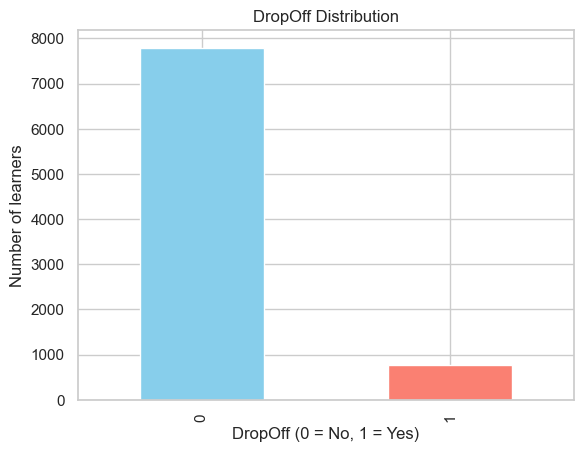

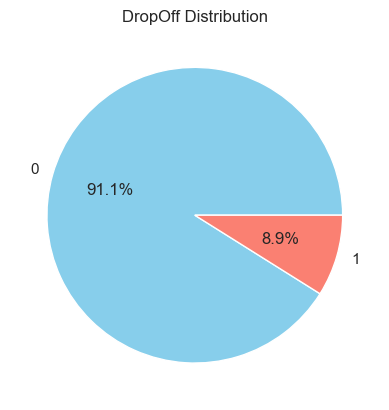

In [93]:
# DropOff count
dropoff_counts = df['DropOff'].value_counts()
dropoff_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('DropOff Distribution')
plt.xlabel('DropOff (0 = No, 1 = Yes)')
plt.ylabel('Number of learners')
plt.show()

# Pie chart
dropoff_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('DropOff Distribution')
plt.ylabel('')
plt.show()


# **Engaged count**

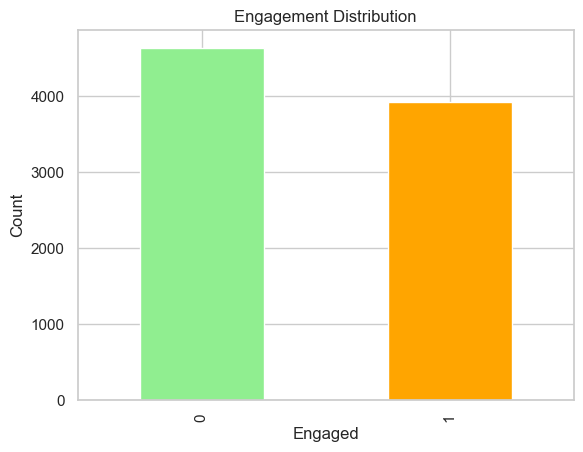

In [94]:
engaged_counts = df['Engaged'].value_counts()
engaged_counts.plot(kind='bar', color=['lightgreen', 'orange'])
plt.title('Engagement Distribution')
plt.xlabel('Engaged')
plt.ylabel('Count')
plt.show()


# **Demographics**
---
- Age distribution

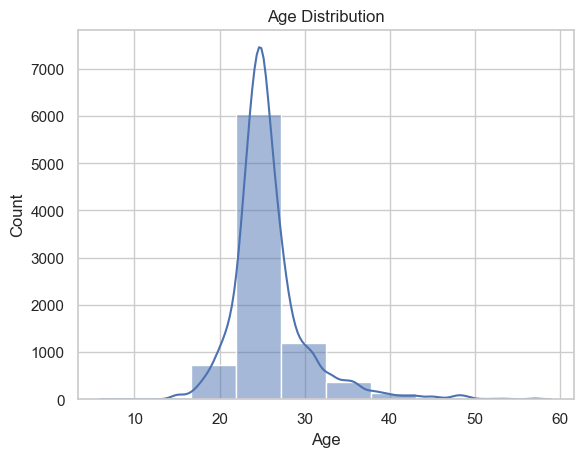

In [95]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


Age vs DropOff

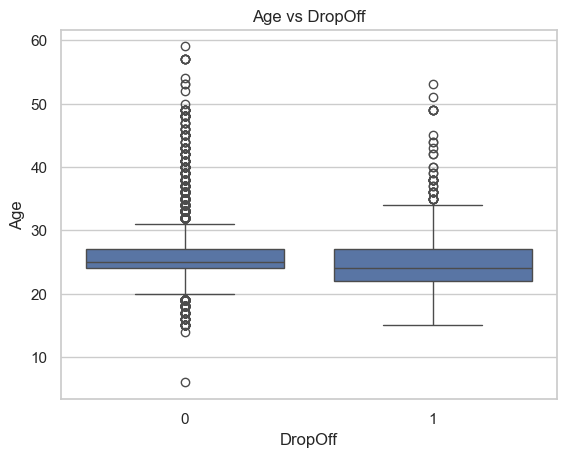

In [96]:
sns.boxplot(x='DropOff', y='Age', data=df)
plt.title('Age vs DropOff')
plt.xlabel('DropOff')
plt.ylabel('Age')
plt.show()


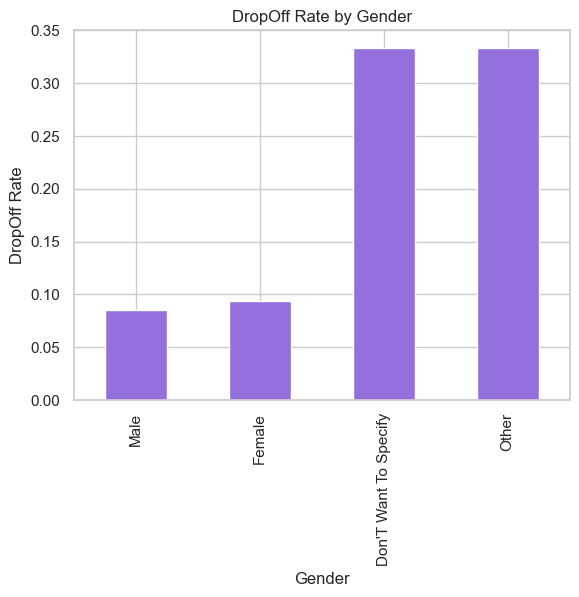

In [97]:
gender_dropoff = df.groupby('Gender')['DropOff'].mean().sort_values()
gender_dropoff.plot(kind='bar', color='mediumpurple')
plt.title('DropOff Rate by Gender')
plt.ylabel('DropOff Rate')
plt.show()


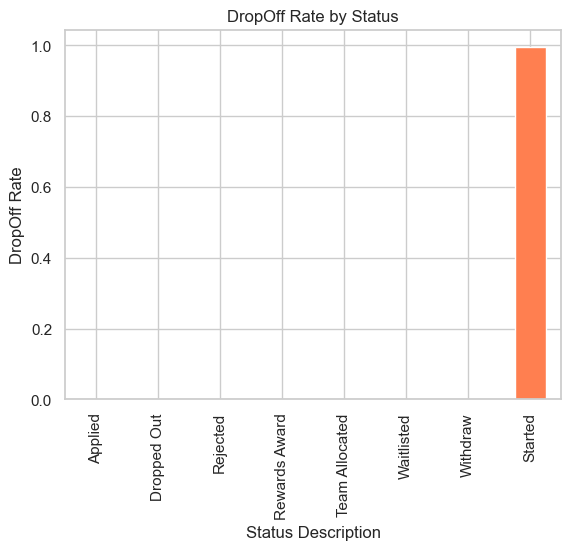

In [98]:
status_dropoff = df.groupby('Status Description')['DropOff'].mean().sort_values()
status_dropoff.plot(kind='bar', color='coral')
plt.title('DropOff Rate by Status')
plt.ylabel('DropOff Rate')
plt.show()

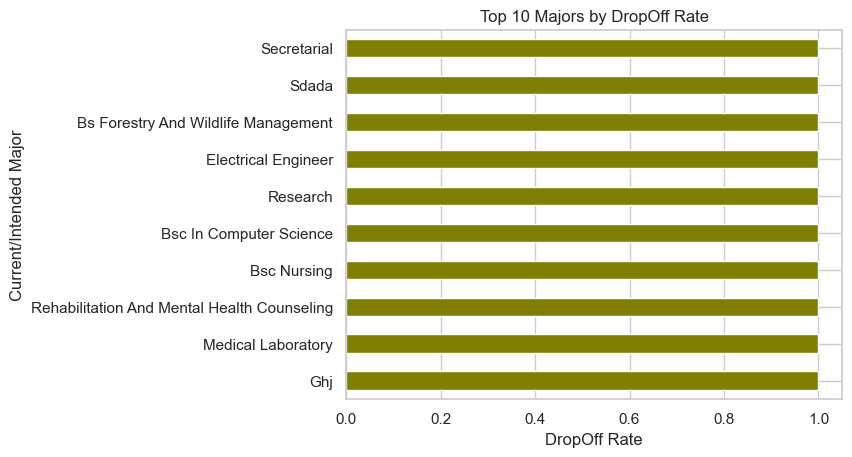

In [99]:
major_dropoff = df.groupby('Current/Intended Major')['DropOff'].mean().sort_values(ascending=False).head(10)
major_dropoff.plot(kind='barh', color='olive')
plt.title('Top 10 Majors by DropOff Rate')
plt.xlabel('DropOff Rate')
plt.show()


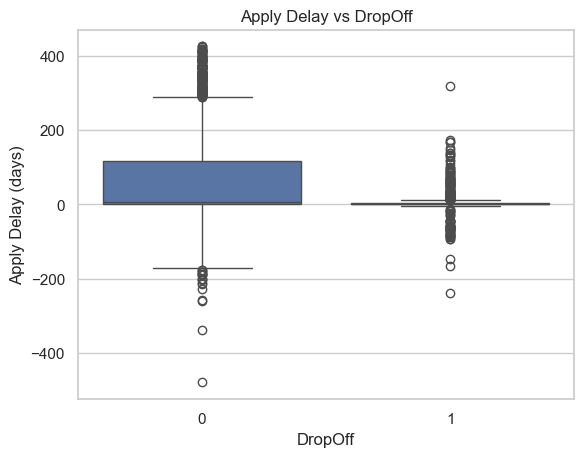

In [100]:
sns.boxplot(x='DropOff', y='Apply Delay (days)', data=df)
plt.title('Apply Delay vs DropOff')
plt.show()


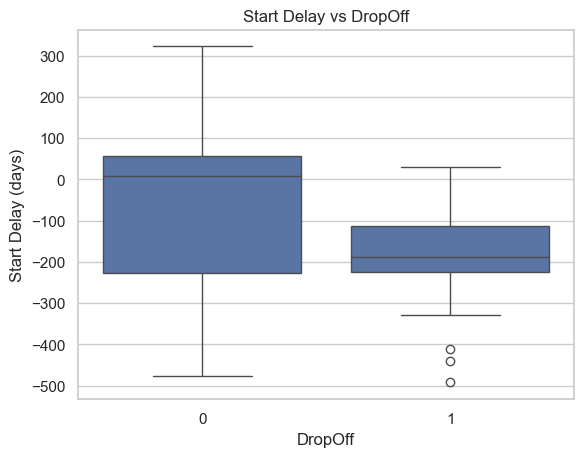

In [101]:
sns.boxplot(x='DropOff', y='Start Delay (days)', data=df)
plt.title('Start Delay vs DropOff')
plt.show()


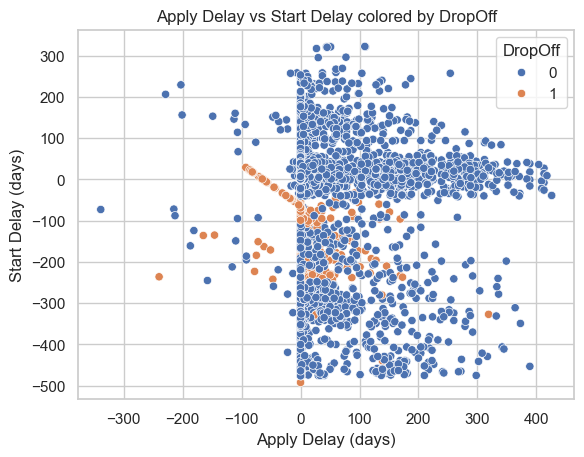

In [102]:
sns.scatterplot(x='Apply Delay (days)', y='Start Delay (days)', hue='DropOff', data=df)
plt.title('Apply Delay vs Start Delay colored by DropOff')
plt.show()


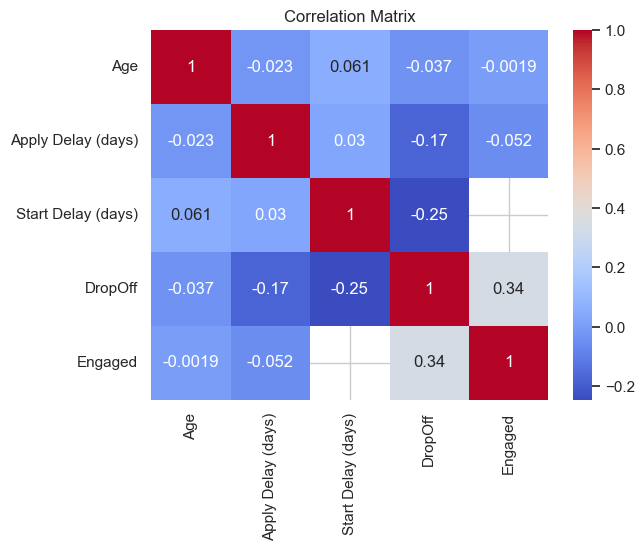

In [103]:
# Correlation matrix
corr = df[['Age', 'Apply Delay (days)', 'Start Delay (days)', 'DropOff', 'Engaged']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


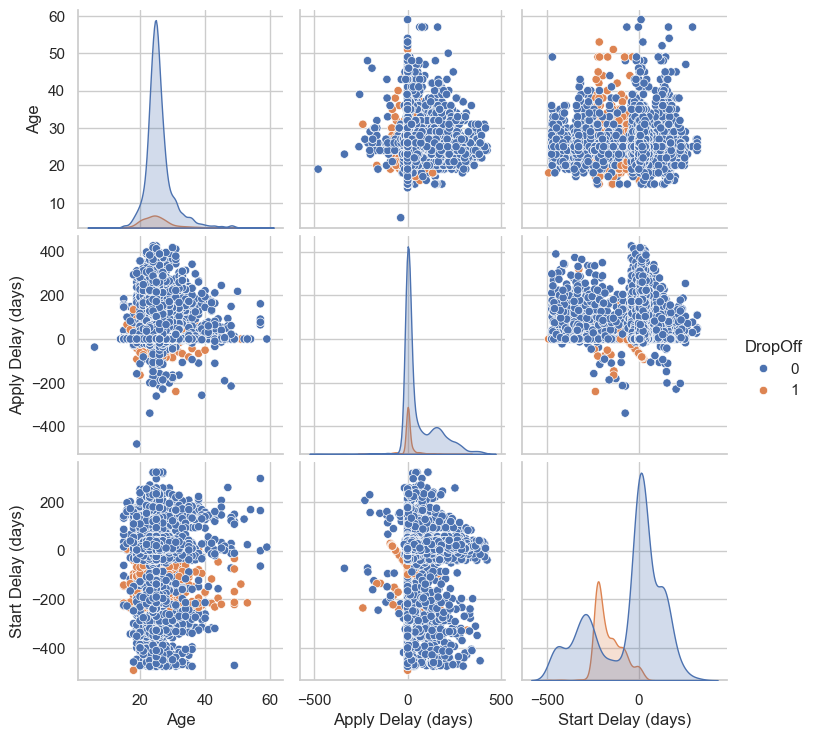

In [104]:
sns.pairplot(df, vars=['Age', 'Apply Delay (days)', 'Start Delay (days)'], hue='DropOff')
plt.show()


In [105]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
cat_cols = ['Gender', 'Country', 'Institution Name', 'Current/Intended Major', 'Status Description']
df_encoded = df.copy()

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Drop text-heavy columns that don't help (or keep if relevant)
drop_cols = ['Opportunity Name', 'Opportunity Category', 'Opportunity Id', 'Opportunity End Date', 
             'Learner SignUp DateTime', 'Entry created at', 'Apply Date', 'Opportunity Start Date', 'Date of Birth']
df_encoded = df_encoded.drop(columns=drop_cols)

# Features and target
X = df_encoded.drop(columns=['DropOff'])
y = df_encoded['DropOff']

# Scale numeric features
num_cols = ['Age', 'Apply Delay (days)', 'Start Delay (days)']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Now X and y are ready for model training!
print(X.head())


   Gender  Country  Institution Name  Current/Intended Major  \
0       1       45              1116                     353   
1       1       25              1282                     236   
2       2       64               638                     109   
3       1       64              1288                     236   
4       2       64              1288                     109   

   Status Description  Status Code  Engaged       Age  Apply Delay (days)  \
0                   4         1080        1 -0.400275           -0.617653   
1                   4         1080        1 -0.171600           -0.617653   
2                   4         1080        1 -0.628950           -0.387454   
3                   5         1070        1  0.057075           -0.168218   
4                   4         1080        1 -0.171600           -0.617653   

   Start Delay (days)  
0           -0.833028  
1           -0.582229  
2           -0.582229  
3           -1.505623  
4            0.073267  
